In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs
%matplotlib inline

In [19]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=1)

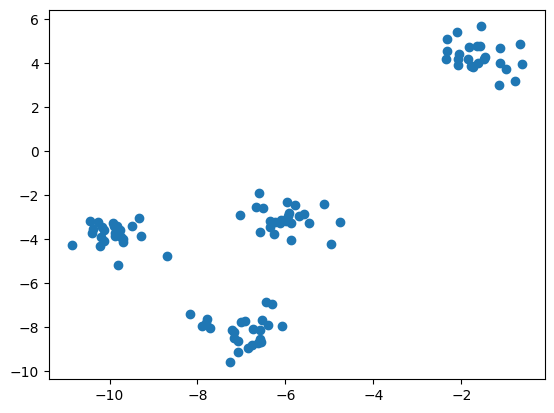

In [20]:
plt.scatter(X[:, 0],  X[:, 1])

In [21]:
WCSS = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=1)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

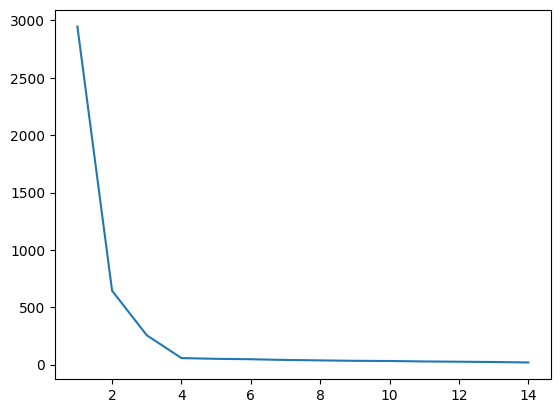

In [22]:
plt.plot(range(1,15), WCSS)

In [72]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=1, max_iter=300)
clusters = kmeans.fit_predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [73]:
acc = 0.005
x_min, x_max, y_min, y_max = (X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
xx, yy = np.meshgrid(np.arange(x_min, x_max, acc), np.arange(y_min, y_max, acc))
Z = kmeans.predict(np.c_[np.ravel(xx), np.ravel(yy)])
Z = Z.reshape(xx.shape)

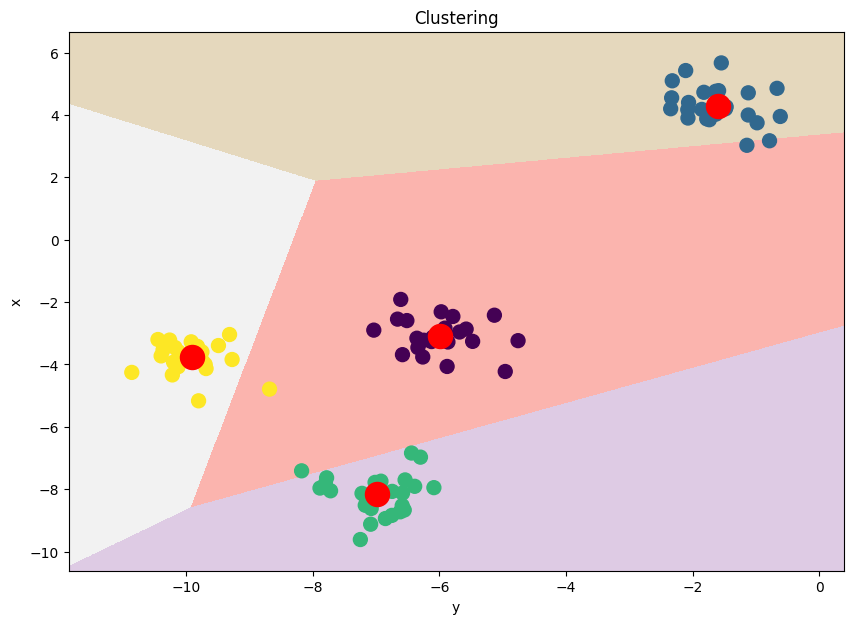

In [74]:
plt.figure(1, figsize=(10,7))
plt.clf()
plt.imshow(Z, interpolation='nearest', cmap=plt.cm.Pastel1, extent=(x_min-1, x_max+1, y_min-1, y_max+1), aspect='auto')
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, s=100)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], c='red', s=300)
plt.ylabel('x') , plt.xlabel('y')
plt.title("Clustering")
plt.show()